In [83]:
import pandas as pd
import numpy as np
 
# data to use
cust = pd.DataFrame({'age' : np.arange(30,51), 
                    'sales' : np.repeat([65,60,80],7)})
 
freq = np.repeat([3,7,4,2,1,1,2],3)

# sales는 각 고객별 총판매금액이며 freq는 구매횟수이다.

In [84]:
# 문제1: 고객의 수를 계산하라

cust_cnt = len(cust)
print(cust_cnt)

21


In [85]:
# 문제2: 고객의 나이를 큰값에서 작은 값의 순서로 정렬하라

cust.age.sort_values(ascending=False)

20    50
19    49
18    48
17    47
16    46
15    45
14    44
13    43
12    42
11    41
10    40
9     39
8     38
7     37
6     36
5     35
4     34
3     33
2     32
1     31
0     30
Name: age, dtype: int32

In [86]:
# 문제3: 고객의 나이 중 두번째로 큰 값은 얼마인가?

cust.age.max()-1

49

In [87]:
# 문제4: sales의 평균값은 얼마인가?

cust.sales.mean()

68.33333333333333

In [88]:
# 문제5: 각 고객별로 sales와 전체고객의 sales 평균간의 차이는 얼마인가?

diff = cust.sales - cust.sales.mean()
cust['diff'] = diff
print(cust)

    age  sales       diff
0    30     65  -3.333333
1    31     65  -3.333333
2    32     65  -3.333333
3    33     65  -3.333333
4    34     65  -3.333333
5    35     65  -3.333333
6    36     65  -3.333333
7    37     60  -8.333333
8    38     60  -8.333333
9    39     60  -8.333333
10   40     60  -8.333333
11   41     60  -8.333333
12   42     60  -8.333333
13   43     60  -8.333333
14   44     80  11.666667
15   45     80  11.666667
16   46     80  11.666667
17   47     80  11.666667
18   48     80  11.666667
19   49     80  11.666667
20   50     80  11.666667


In [89]:
# 문제6: cust dataframe에 freq를 걸럼으로 추가한 후 처음부터 3명의 고객을 출력하라.

cust['freq'] = freq
cust.head(3)

,age,sales,diff,freq
0,30,65,-3.333333,3
1,31,65,-3.333333,3
2,32,65,-3.333333,3


In [90]:
# 문제7: 고객별 구매1건당 평균 sales 금액을 구하여 avgsales 라는 이름의 컬럼으로 cust dataframe에 추가한 후 마지막 두 명의 고객을 출력하라.

cust['avgsales'] = cust.sales / cust.freq
cust.tail(2)

,age,sales,diff,freq,avgsales
19,49,80,11.666667,2,40.0
20,50,80,11.666667,2,40.0


In [91]:
# 문제8: cust dataframe을 avgsales 순서로 정렬하고, avgsales가 가장 큰 세명의 고객을 출력하라.

cust.sort_values(by = 'avgsales', ascending = False).head(3)

,age,sales,diff,freq,avgsales
17,47,80,11.666667,1,80.0
16,46,80,11.666667,1,80.0
15,45,80,11.666667,1,80.0


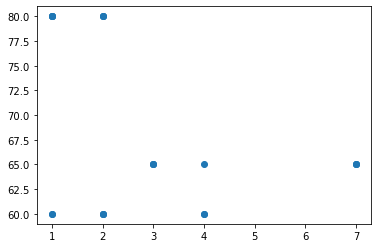

In [92]:
# 문제9: 고객의 freq와 sales간의 분포를 scatter plot으로 작성하라.

import matplotlib.pyplot as plt

plt.scatter(cust.freq, cust.sales)
plt.show()

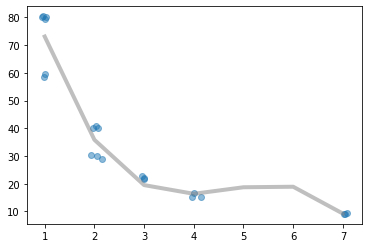

In [93]:
# 문제10 : freq와 평균sales간의 관계를 scatterplot을 이용하여 시각화하고 점들간의 분포를 보여주는 폴리노미얼 추세선을 추가하라. 
# 동일 좌표에 복수의 점이 존재할 수 있으므로 jitter 함수를 이용하여 복수의 점이 존재하는지를 scatterplot에 반영하라. 
# 결과는 다음의 챠트와 같은 모습이 되어야 한다

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

def jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

degree=3

polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(np.array(cust.freq).reshape(-1, 1), cust.avgsales)

x_reg = np.arange(8)[1:]
y_reg = polyreg.predict(x_reg.reshape(-1, 1))

cust.freq = jitter(cust.freq)
cust.avgsales = jitter(cust.avgsales)

plt.scatter(cust.freq, cust.avgsales, alpha=0.5)
plt.plot(x_reg, y_reg, color='gray', linewidth=4, alpha=0.5)
plt.show()

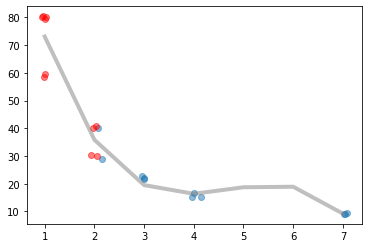

In [94]:
# 문제11: 문제 10의 결과에서 40대인 고객들만 red color로 점을 표시하라

age40 = cust[(cust['age'] >= 40) & (cust['age'] < 50)]
ageOther = cust[~((cust['age'] >= 40) & (cust['age'] < 50))]

plt.scatter(ageOther.freq, ageOther.avgsales, alpha=0.5)
plt.scatter(age40.freq, age40.avgsales, color='red', alpha=0.5)
plt.plot(x_reg, y_reg, color='gray', linewidth=4, alpha=0.5)
plt.show()

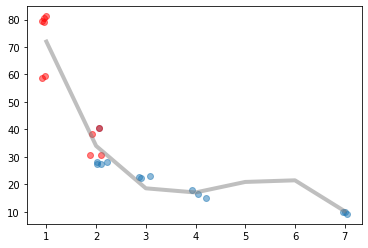

In [95]:
# 문제12: 고객리스트에 동일하게 36세이며 두 번에 걸쳐 총 55를 구매한 고객을 세 명 추가한 후 문제 11과 같은 형식의 scatter plot을 작성하라

addCust = pd.DataFrame(list(np.repeat({'age' : 36, 'sales' : 55, 'freq' : 2}, 3)))
addCust['avgsales'] = addCust.sales / addCust.freq

cust = cust.append(addCust)

polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(np.array(cust.freq).reshape(-1, 1), cust.avgsales)

x_reg = np.arange(8)[1:]
y_reg = polyreg.predict(x_reg.reshape(-1, 1))

cust.freq = jitter(cust.freq)
cust.avgsales = jitter(cust.avgsales)

age40 = cust[(cust['age'] >= 40) & (cust['age'] < 50)]
ageOther = cust[~((cust['age'] >= 40) & (cust['age'] < 50))]

plt.scatter(ageOther.freq, ageOther.avgsales, alpha=0.5)
plt.scatter(age40.freq, age40.avgsales, color='red', alpha=0.5)
plt.plot(x_reg, y_reg, color='gray', linewidth=4, alpha=0.5)
plt.show()